In [1]:
#Importowanie potrzebnych bibliotek
#pip install missingno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno
from sklearn import linear_model
%matplotlib inline

In [2]:
#Załadowanie danych
df = pd.read_csv("C:/Users/siepa/OneDrive/Pulpit/diabetes.csv")
df.head(3)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
#Szukanie brakujących wartości
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#Przygotowanie braków danych do dalszej analizy
df.loc[df["Glucose"] == 0.0, "Glucose"] = np.NAN
df.loc[df["BloodPressure"] == 0.0, "BloodPressure"] = np.NAN
df.loc[df["SkinThickness"] == 0.0, "SkinThickness"] = np.NAN
df.loc[df["Insulin"] == 0.0, "Insulin"] = np.NAN
df.loc[df["BMI"] == 0.0, "BMI"] = np.NAN

df.isnull().sum()[1:6]

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

<AxesSubplot:>

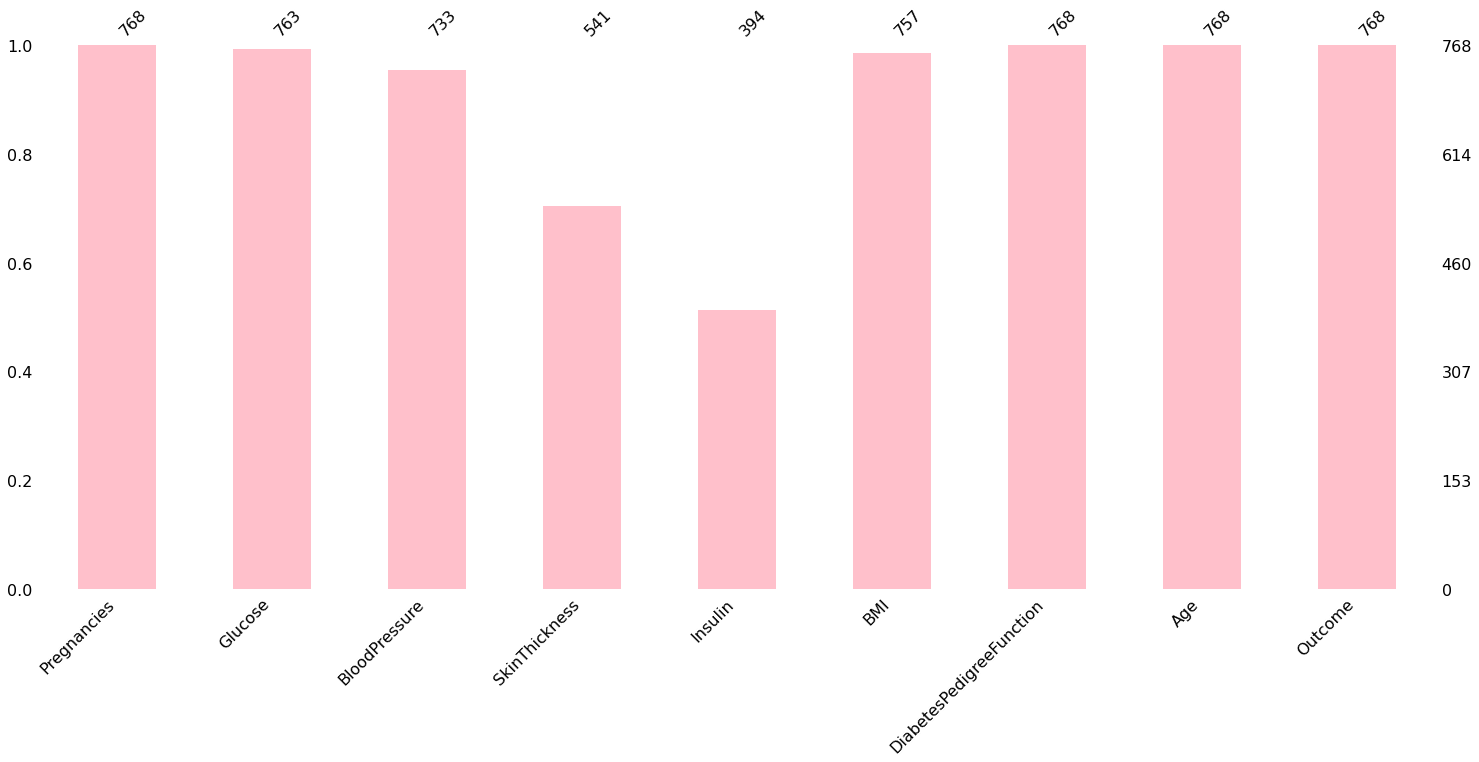

In [6]:
#Barplot kompletności danych
mno.bar(df,color="pink")

<AxesSubplot:>

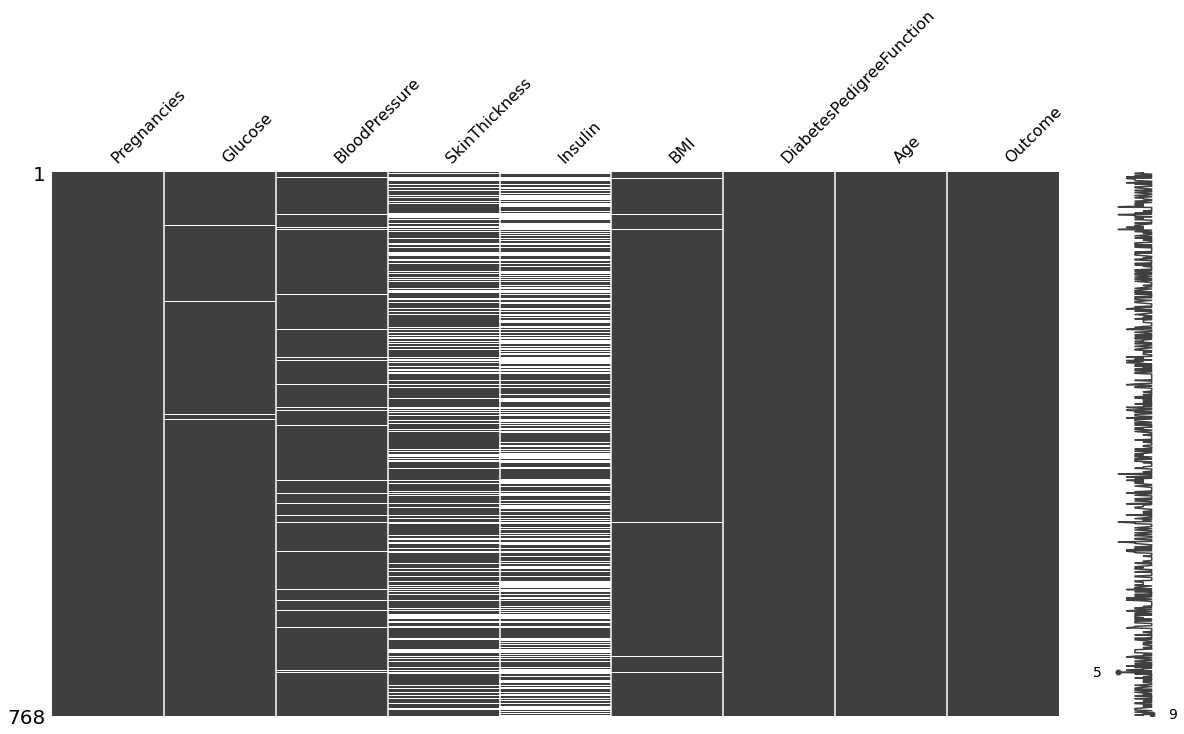

In [7]:
#Macierz braków danych
mno.matrix(df, figsize = (20, 10))

<AxesSubplot:>

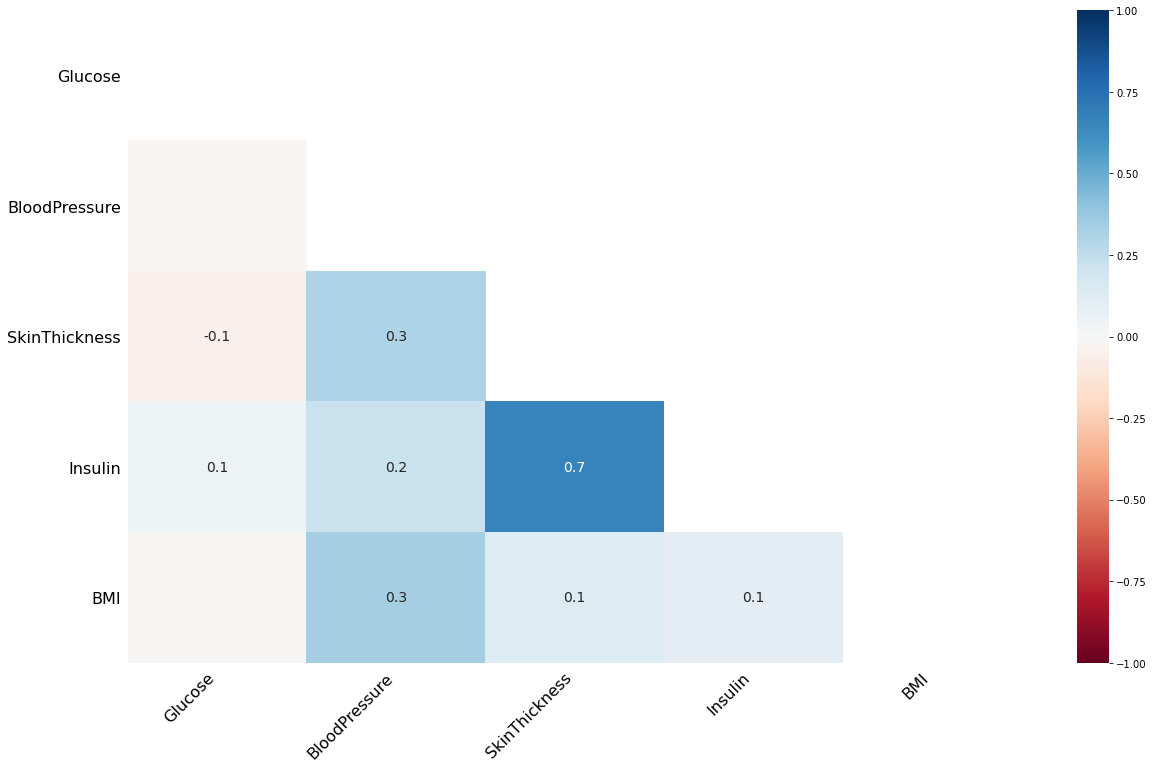

In [8]:
#Korelacja braków danych
mno.heatmap(df)

In [9]:
#Imputacja losowa
kolumny_z_brakami = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
def imputacja_losowa(df, kolumna):

    liczba_brakow = df[kolumna].isnull().sum()
    wartosci_niezerowe = df.loc[df[kolumna].notnull(), kolumna]
    df.loc[df[kolumna].isnull(), kolumna + '_imp'] = np.random.choice(wartosci_niezerowe, liczba_brakow, replace = True)
    
    return df

for kolumna in kolumny_z_brakami:
    df[kolumna + '_imp'] = df[kolumna]
    df = imputacja_losowa(df, kolumna)
df  

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_imp,BloodPressure_imp,SkinThickness_imp,Insulin_imp,BMI_imp
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,148.0,72.0,35.0,48.0,33.6
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,85.0,66.0,29.0,182.0,26.6
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,183.0,64.0,41.0,74.0,23.3
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,89.0,66.0,23.0,94.0,28.1
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,101.0,76.0,48.0,180.0,32.9
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0,122.0,70.0,27.0,205.0,36.8
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,121.0,72.0,23.0,112.0,26.2
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1,126.0,60.0,15.0,231.0,30.1


In [10]:
#Regresja deterministyczna
#Tworzę ramke danych jedynie z imputowanymi kolumnami
DR_data = pd.DataFrame(columns = ["DR" + nazwa for nazwa in kolumny_z_brakami])

for kolumna in kolumny_z_brakami:
        
    DR_data["DR" + kolumna] = df[kolumna + "_imp"]
    parameters = list(set(df.columns) - set(kolumny_z_brakami) - {kolumna + '_imp'})
    
    #Tworzę model do estymacji brakujących wartości
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[kolumna + '_imp'])
    
    #Uzupełniam drugą tabelę
    DR_data.loc[df[kolumna].isnull(), "DR" + kolumna] = model.predict(df[parameters])[df[kolumna].isnull()]


In [11]:
DR_data

,DRGlucose,DRBloodPressure,DRSkinThickness,DRInsulin,DRBMI
0,148.0,72.0,35.000000,196.061483,33.6
1,85.0,66.0,29.000000,127.713985,26.6
2,183.0,64.0,22.884511,225.744835,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1
...,...,...,...,...,...
763,101.0,76.0,48.000000,180.000000,32.9
764,122.0,70.0,27.000000,154.491861,36.8
765,121.0,72.0,23.000000,112.000000,26.2
766,126.0,60.0,28.202328,162.766255,30.1


<AxesSubplot:>

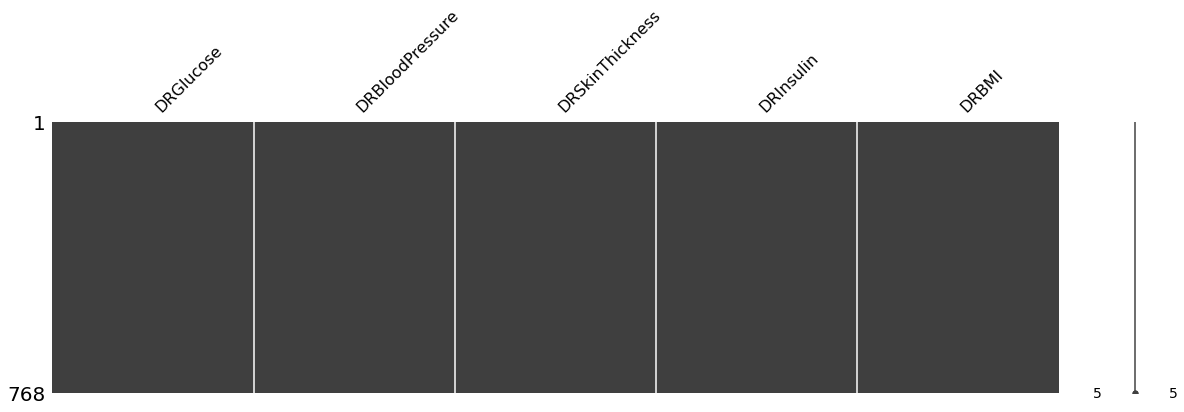

In [12]:
#Mamy brak braków danych
mno.matrix(DR_data, figsize = (20,5))

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


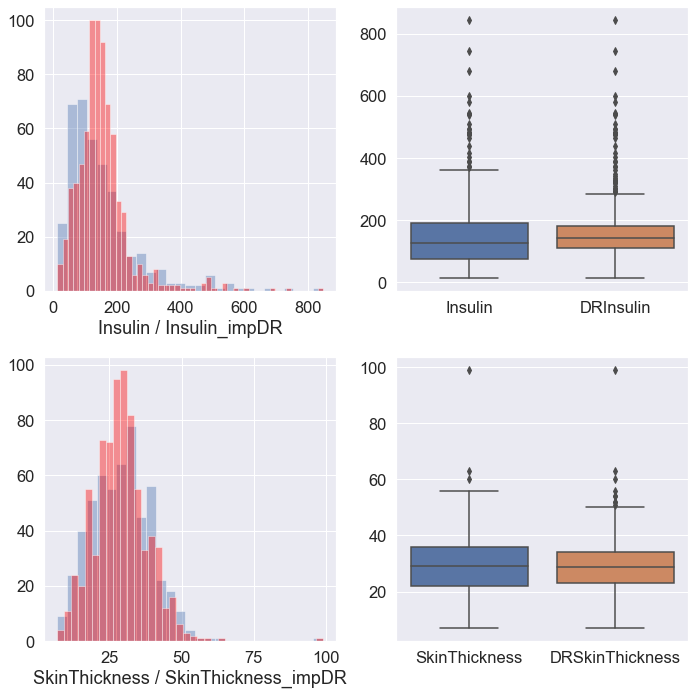

In [13]:
#Wizualizacja dla regresji deterministycznej
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(10, 10)

for index, zmienna in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(df[zmienna].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(DR_data["DR" + zmienna], kde = False, ax = axes[index, 0], color = 'red')
    axes[index, 0].set(xlabel = zmienna+ " / " + zmienna + '_impDR')
    
    
    sns.boxplot(data = pd.concat([df[zmienna],DR_data["DR" + zmienna]], axis = 1),
                ax = axes[index, 1])
    
    
    plt.tight_layout()

In [14]:
#Regresja stochastyczna
#Tworzę ramke danych jedynie z imputowanymi kolumnami
SR_data = pd.DataFrame(columns = ["SR" + nazwa for nazwa in kolumny_z_brakami])

for kolumna in kolumny_z_brakami:
        
    SR_data["SR" + kolumna] = df[kolumna + '_imp']
    parameters = list(set(df.columns) - set(kolumny_z_brakami) - {kolumna + '_imp'})
    #Tworzę bazowy model
    model = linear_model.LinearRegression()
    model.fit(X = df[parameters], y = df[kolumna + '_imp'])
    
    #Dodaję zakłócenie
    predict = model.predict(df[parameters])
    std_error = (predict[df[kolumna].notnull()] - df.loc[df[kolumna].notnull(), kolumna + '_imp']).std()
    
    
    random_predict = np.random.normal(size = df[kolumna].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    SR_data.loc[(df[kolumna].isnull()) & (random_predict > 0), "SR" + kolumna] = random_predict[(df[kolumna].isnull()) & 
                                                                            (random_predict > 0)]


In [15]:

SR_data

,SRGlucose,SRBloodPressure,SRSkinThickness,SRInsulin,SRBMI
0,148.0,72.0,35.000000,147.651237,33.6
1,85.0,66.0,29.000000,170.529462,26.6
2,183.0,64.0,30.937315,297.518761,23.3
3,89.0,66.0,23.000000,94.000000,28.1
4,137.0,40.0,35.000000,168.000000,43.1
...,...,...,...,...,...
763,101.0,76.0,48.000000,180.000000,32.9
764,122.0,70.0,27.000000,265.997505,36.8
765,121.0,72.0,23.000000,112.000000,26.2
766,126.0,60.0,30.462719,231.000000,30.1


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


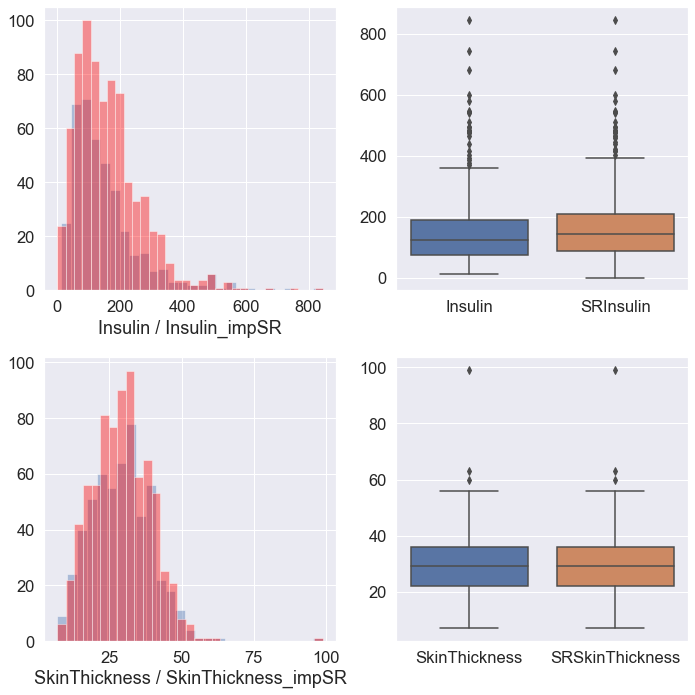

In [16]:
#Wizualizacja dla regresji stochastycznej
sns.set(font_scale = 1.5)
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(10, 10)

for index, zmienna in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(df[zmienna].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(SR_data["SR" + zmienna], kde = False, ax = axes[index, 0], color = 'red')
    axes[index, 0].set(xlabel = zmienna+ " / " + zmienna + '_impSR')
    
    
    sns.boxplot(data = pd.concat([df[zmienna],SR_data["SR" + zmienna]], axis = 1),
                ax = axes[index, 1])
    
    
    plt.tight_layout()

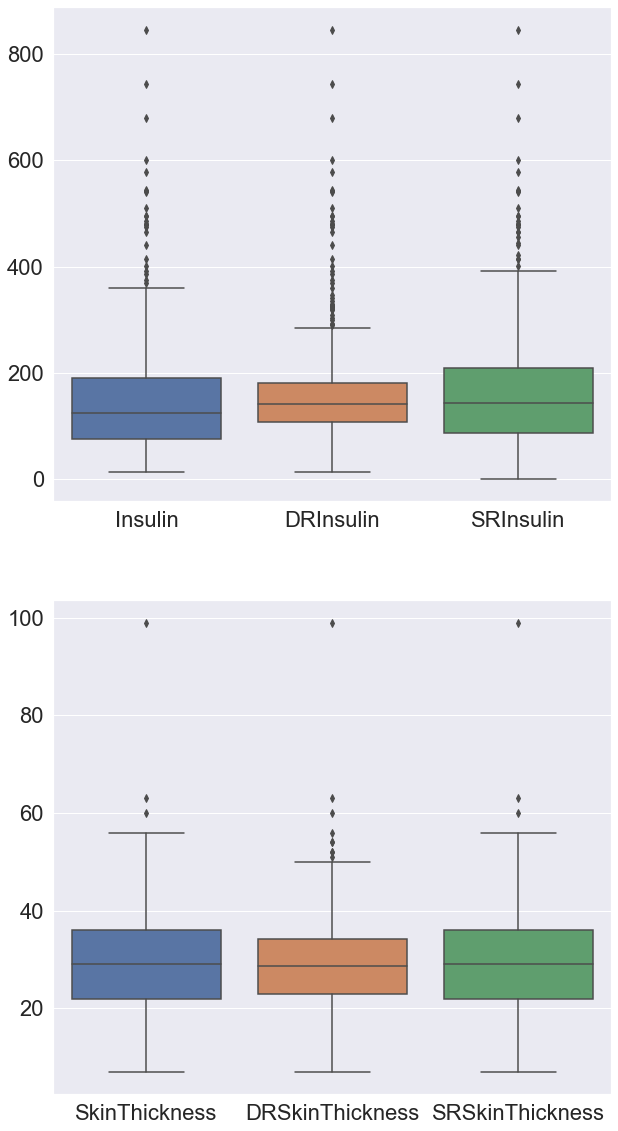

In [17]:
#Wykresy pudełkowe dla SR i DR
sns.set(font_scale = 2)
fig, axes = plt.subplots(2)
fig.set_size_inches(10,20)
for index, zmienna in enumerate(["Insulin", "SkinThickness"]):
    
    
    sns.boxplot(data = pd.concat([df[zmienna],DR_data["DR" + zmienna],SR_data["SR" + zmienna]], axis = 1),
                ax = axes[index])
    
plt.show()

In [18]:
#Statystki podsumowujące
pd.concat([df[["Insulin", "SkinThickness"]], SR_data[["SRInsulin", "SRSkinThickness"]],DR_data[["DRInsulin", "DRSkinThickness"]]], axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
Insulin,394.0,155.548223,118.775855,14.000000,76.250000,125.000000,190.000000,846.0
SkinThickness,541.0,29.153420,10.476982,7.000000,22.000000,29.000000,36.000000,99.0
SRInsulin,768.0,163.261930,107.161998,0.963522,86.839747,144.261371,210.000000,846.0
SRSkinThickness,768.0,29.172039,10.035899,7.000000,22.000000,29.015836,36.000000,99.0
DRInsulin,768.0,154.987449,88.645599,14.000000,108.535213,141.080653,181.212735,846.0
DRSkinThickness,768.0,28.982539,9.190918,7.000000,23.000000,28.647153,34.118874,99.0
